## HR ANALYTICS

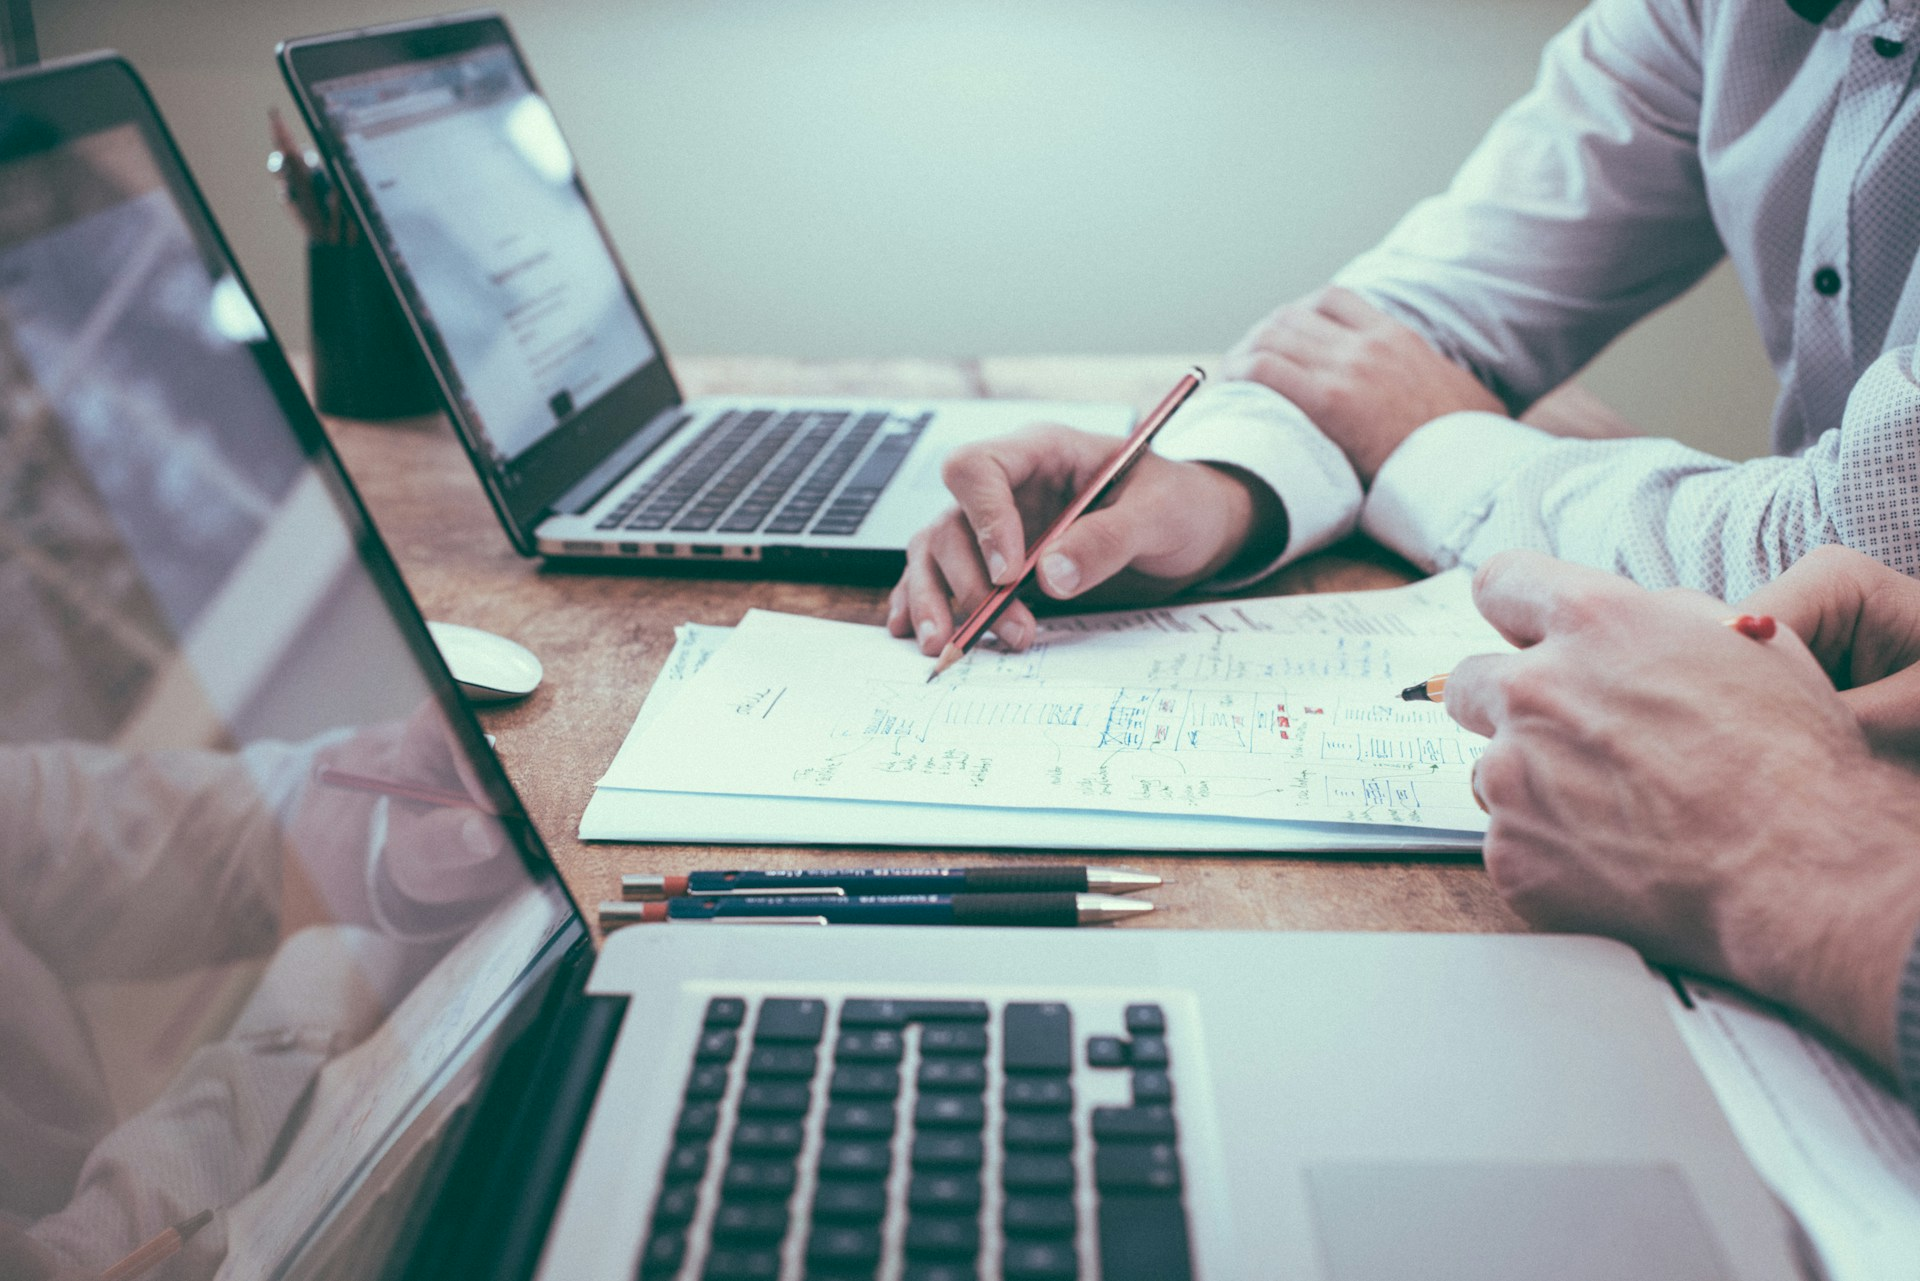

#### Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

- They first identify a set of employees based on recommendations/ past performance
- Selected employees go through the separate training and evaluation program for each vertical.These programs are based on the required skill of each vertical
- At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered)

Authors
- Rayan Joseph - https://www.linkedin.com/in/rayan-joseph/
- Lavanya Jyndyam - https://www.linkedin.com/in/lavanyajandyam/

## Prep

In [1]:
import pandas as pd 
import warnings 
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math 
from statistics import median 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, make_scorer 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score 
from tabulate import tabulate 
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.preprocessing import PolynomialFeatures 
import warnings 
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
import pickle 
import xgboost as xgb 
from catboost import CatBoostClassifier 
from sklearn.preprocessing import StandardScaler 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import to_categorical 
from sklearn.pipeline import Pipeline 

In [2]:

train = pd.read_csv('train_LZdllcl (1).csv')
test = pd.read_csv('testHR.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## EDA

### Cleaning the data/Looking for missing values.

In [4]:
def missing(df):
    return df.isna().sum()
    
print("Missing data for the Train")
missing(train)

Missing data for the Train


employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
print("Missing data for the Test")
missing(test)

Missing data for the Test


employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

- To handle the missing values I would like to tak _IMPUTATION MISSING VALUE_. I can just remove NaN values but I might lose some valuable data.

#### Handling the Missing values

In [6]:
# i used other because, all the data points are valuable.
train['education'].fillna("others", inplace=True)
test['education'].fillna("others", inplace=True)

#This is a INT column, I've seen the correlatiion where all the row which has the blank are new employees of the company. So, logically company won't have the previous year rating. So, filling with an "0"
train['previous_year_rating'].fillna(0, inplace=True)
test['previous_year_rating'].fillna(0, inplace=True) 

# Verify that the missing values for train 
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [7]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

#### Calculating the imbalance.

In [8]:
# Check the balance of categorical data and the distribution of numerical data
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(exclude=['object']).columns

# Calculate the value counts for each categorical column to assess balance
categorical_balance = {col: train[col].value_counts(normalize=True) for col in categorical_columns}
pd.DataFrame(categorical_balance)

,department,region,education,gender,recruitment_channel
Analytics,0.097650,NaN,NaN,NaN,NaN
Bachelor's,NaN,NaN,0.669045,NaN,NaN
Below Secondary,NaN,NaN,0.014688,NaN,NaN
Finance,0.046271,NaN,NaN,NaN,NaN
HR,0.044118,NaN,NaN,NaN,NaN
Legal,0.018957,NaN,NaN,NaN,NaN
Master's & above,NaN,NaN,0.272314,NaN,NaN
Operations,0.207050,NaN,NaN,NaN,NaN
Procurement,0.130236,NaN,NaN,NaN,NaN
R&D,0.018227,NaN,NaN,NaN,NaN


### Categorical Data Imbalance
- Department: 'Sales & Marketing' has the highest representation with about 31%, while 'Legal' and 'R&D' are the least represented with under 2% each.
- Region: 'region_2' is the most common with about 23% of entries, indicating a significant regional concentration. Other regions like 'region_18' have very low representation (around 0.1%).
- Education: About 71% of the entries are for 'Bachelor's' degree holders, whereas 'Below Secondary' education is very low at around 1.6%.
- Gender: There is a noticeable imbalance with males representing approximately 71% of the entries.
- Recruitment Channel: The 'other' category dominates with about 56%, and 'referred' is minimal at about 1.9%.

In [9]:
# Summary statistics for numerical columns to check for any imbalances or unusual distributions
numerical_summary = train[numerical_columns].describe()
pd.DataFrame(numerical_summary)

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


### Numerical Data Distribution
- Age: The average age is about 35 years with a standard deviation of 7.68. The age range is from 20 to 60 years.
- Previous Year Rating: After imputation, the median remains at 3, with a spread from 1 to 5.
No of Trainings: Most employees (75th percentile) have had at most one training session, but it goes up to nine.
- Length of Service: The average length of service is about 6 years, with a maximum of 34 years. Most employees have between 3 to 7 years of service.
- KPIs_met >80% & Awards Won?: Both show a significant imbalance where the majority of employees did not meet KPIs more than 80% of the time nor won awards.

### UniVariate and BiVariate Analysis

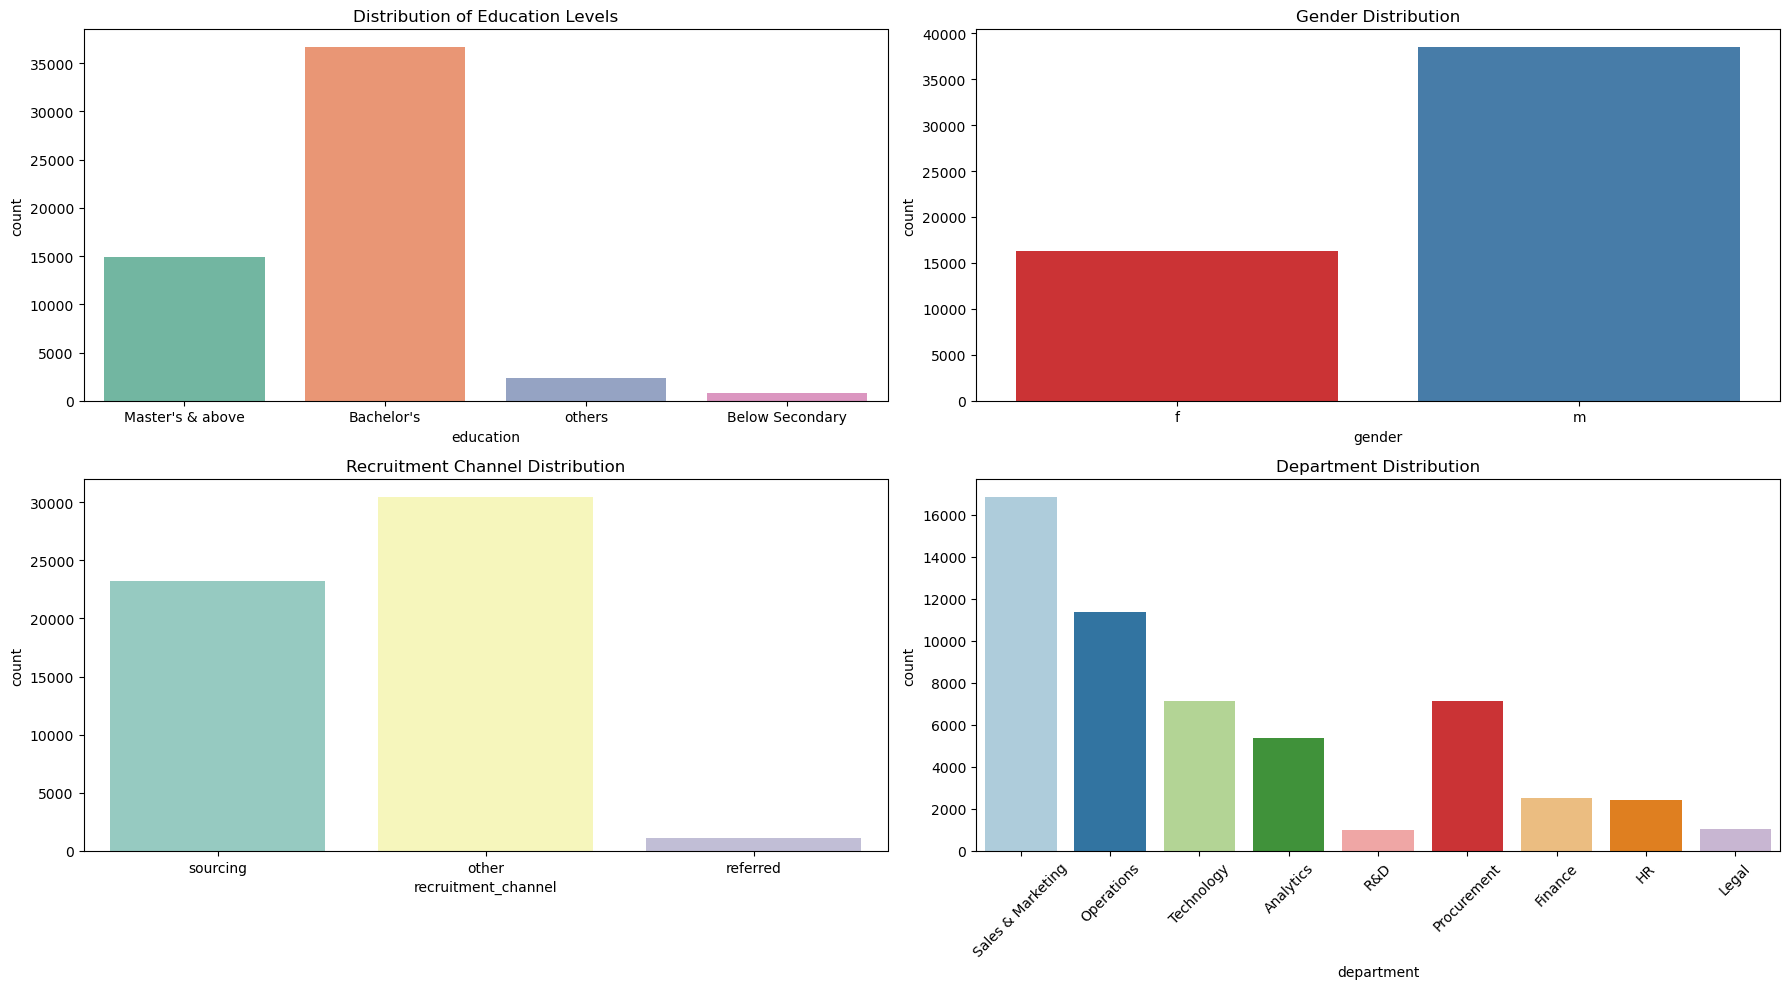

In [10]:
plt.figure(figsize=(18, 10))

plt.subplot(221)
sns.countplot(x='education', data=train, palette='Set2')
plt.title('Distribution of Education Levels')

plt.subplot(222)
sns.countplot(x='gender', data=train, palette='Set1')
plt.title('Gender Distribution')

plt.subplot(223)
sns.countplot(x='recruitment_channel', data=train, palette='Set3')
plt.title('Recruitment Channel Distribution')

plt.subplot(224)
sns.countplot(x='department', data=train, palette='Paired')
plt.xticks(rotation=45)
plt.title('Department Distribution')

plt.tight_layout()
plt.show()


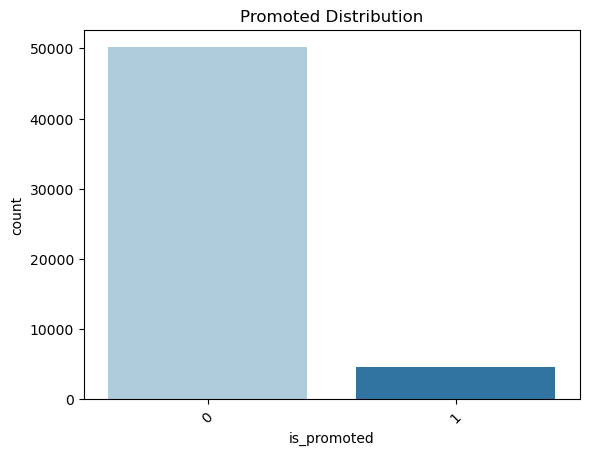

In [11]:
sns.countplot(x='is_promoted', data=train, palette='Paired')
plt.xticks(rotation=45)
plt.title('Promoted Distribution')
plt.show()

Findings:
- Distribution of Education Levels: This shows the frequency of each education level among the employees. Most employees have a Bachelor's degree.
- Gender Distribution: Illustrates the gender imbalance with a significantly higher number of males compared to females.
- Recruitment Channel Distribution: Displays how employees were recruited. The majority were recruited through 'other' channels and 'sourcing', with very few being 'referred'.
- Department Distribution: Highlights the number of employees in each department. 'Sales & Marketing' and 'Operations' have the highest representation, while departments like 'Legal' and 'R&D' have much fewer members.

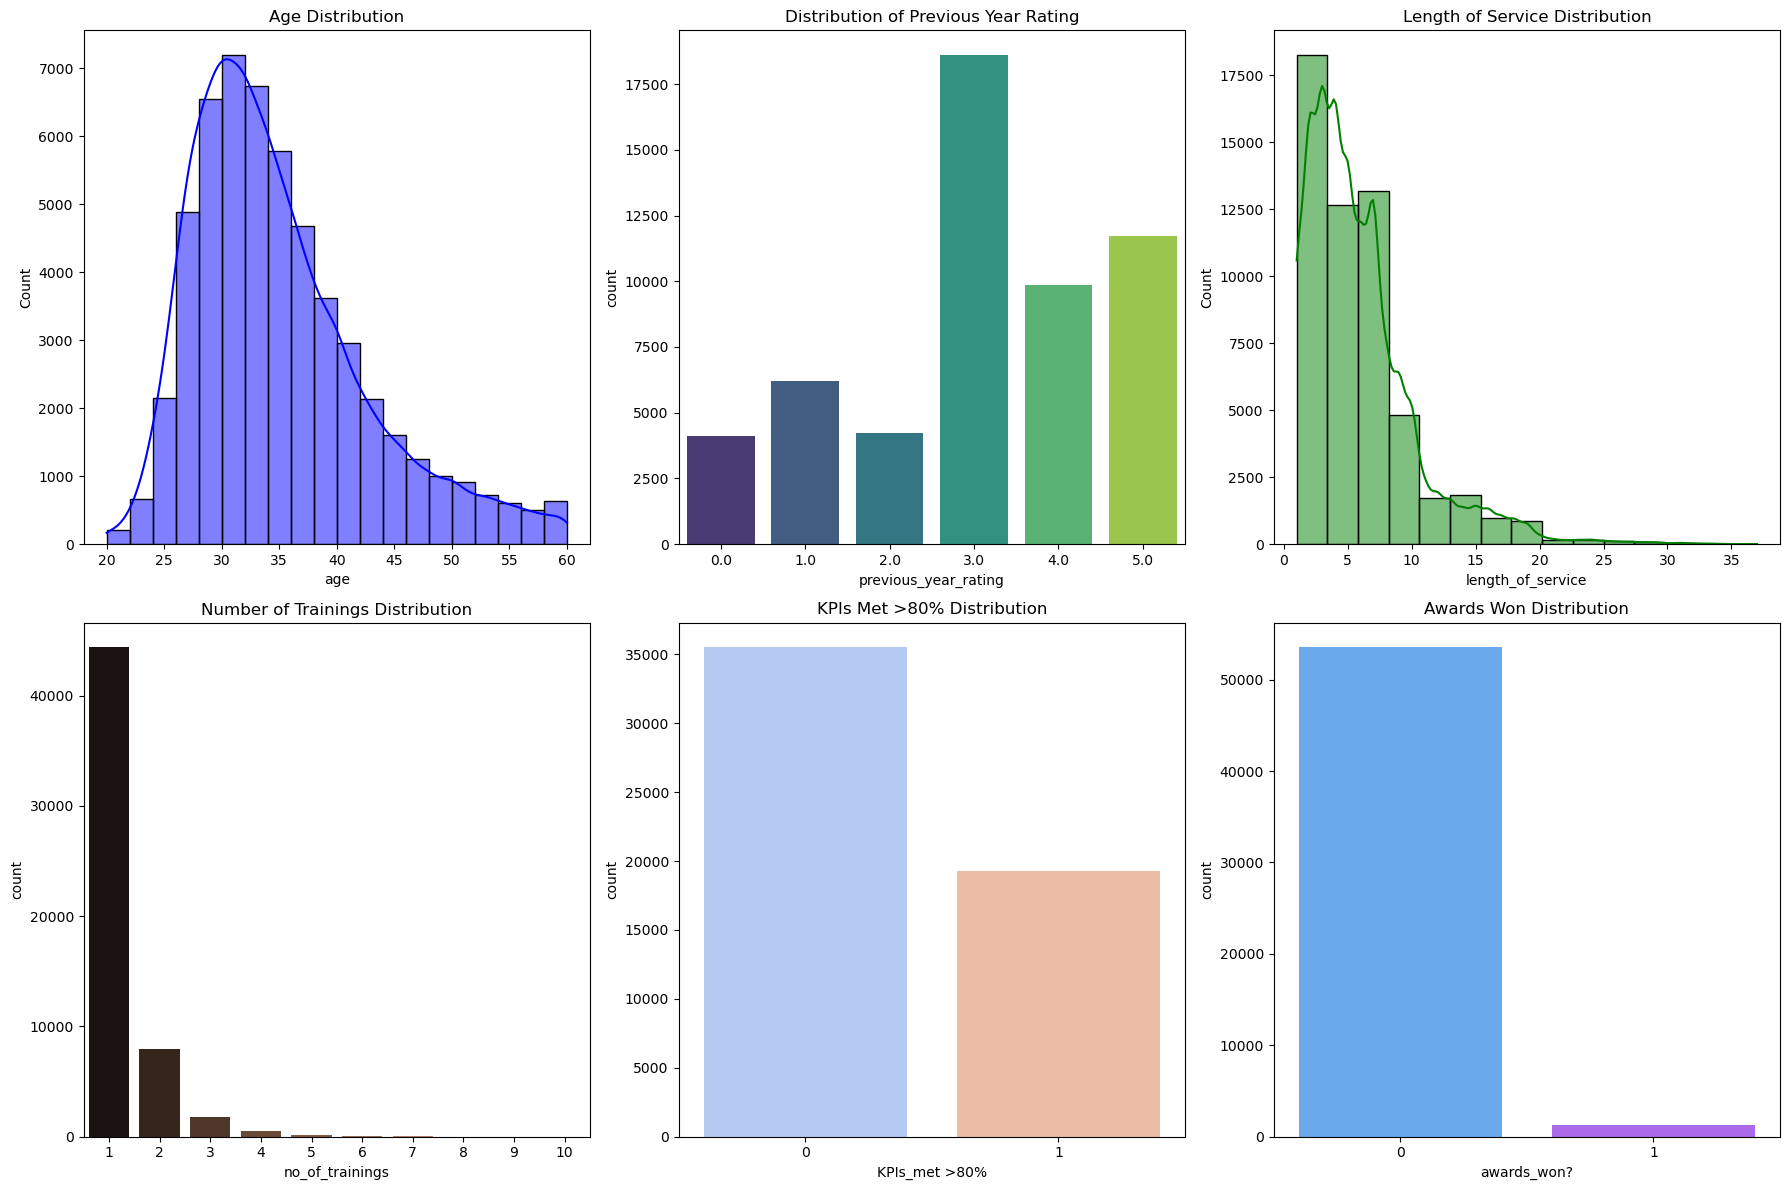

In [12]:
plt.figure(figsize=(18, 12))

plt.subplot(231)
sns.histplot(train['age'], bins=20, color='blue', kde=True)
plt.title('Age Distribution')

plt.subplot(232)
sns.countplot(x='previous_year_rating', data=train, palette='viridis')
plt.title('Distribution of Previous Year Rating')

plt.subplot(233)
sns.histplot(train['length_of_service'], bins=15, color='green', kde=True)
plt.title('Length of Service Distribution')

plt.subplot(234)
sns.countplot(x='no_of_trainings', data=train, palette='copper')
plt.title('Number of Trainings Distribution')

plt.subplot(235)
sns.countplot(x='KPIs_met >80%', data=train, palette='coolwarm')
plt.title('KPIs Met >80% Distribution')

plt.subplot(236)
sns.countplot(x='awards_won?', data=train, palette='cool')
plt.title('Awards Won Distribution')

plt.tight_layout()
plt.show()


Findings:
- Age Distribution: Shows a relatively young workforce, with a peak around the late 20s to early 30s. The distribution has a slight right skew.
- Distribution of Previous Year Rating: Indicates that the majority of ratings are around 3, with fewer employees rated at the extremes (1 and 5).
- Length of Service Distribution: Most employees have between 1 to 10 years of service, with a rapid decrease in frequency as length of service increases.
- Number of Trainings Distribution: Most employees have attended only one training session, with a steep drop-off for multiple training sessions.
- KPIs Met >80% Distribution: Shows that a larger proportion of the workforce has not met the KPIs more than 80% of the time.
- Awards Won Distribution: Very few employees have won awards, indicating that award winners are a small minority in the organization.

### Correlation Matrix

<Figure size 1000x800 with 0 Axes>

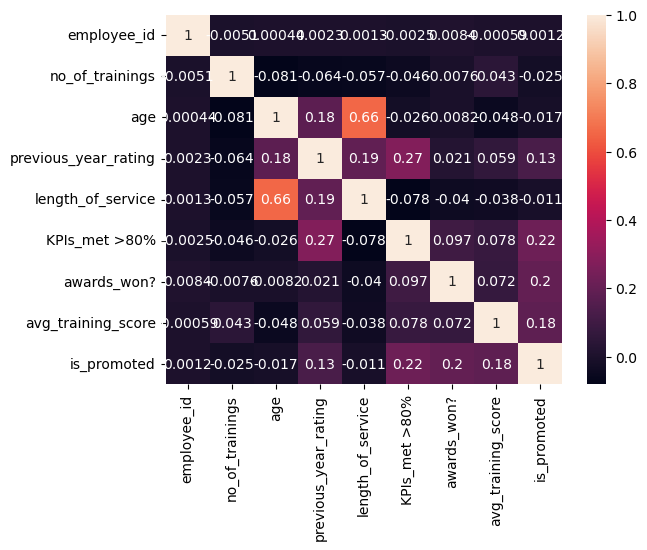

<Figure size 1000x800 with 0 Axes>

In [13]:
dataplot = sns.heatmap(train[numerical_columns].corr(), annot=True)
plt.figure(figsize=(10, 8))

### Correlation Values:
- Positive Correlation (Orange to Red Tones): As one variable increases, the other variable tends to also increase. An example might be between previous_year_rating and avg_training_score, indicating that employees with higher past ratings tend to have higher training scores.
- Negative Correlation (Purple Tones): As one variable increases, the other variable tends to decrease. For instance, no_of_trainings might be negatively correlated with avg_training_score, suggesting that employees undergoing more trainings might not necessarily score higher, possibly indicating remedial training for underperformers.
- No or Weak Correlation (Light Colors): Variables do not have a significant linear relationship. For example, employee_id shows little to no correlation with other metrics, as expected since it’s likely a randomly assigned number.
### Key Observations:
- KPIs_met >80% and awards_won?: There might be a noticeable correlation, suggesting that employees who meet KPIs are more likely to win awards.
- age and length_of_service: Typically, these would show some positive correlation, as employees who are older are likely to have been in service longer.
- previous_year_rating and KPIs_met >80%: There’s likely a positive correlation, implying that higher performance ratings correlate with meeting key performance indicators.

## Feature Engineering

The dataset has more categoriall variable. So, to handle the categorial data Label encoder is suggested.

In [14]:
categorical_columns
def encoding(table):
    label_encoder = preprocessing.LabelEncoder() 
    categorical_columns = table.select_dtypes(include=['object']).columns
    for i in categorical_columns:
        table[i] = label_encoder.fit_transform(table[i]) 

encoding(table=train)
encoding(table=test)

## Applying ML models

In [15]:
Table = [] 
Table_All = [] 
Table_All_c = []
Model = []
Score = []
best_model_score = 0 
Accuracy = []
score_g = make_scorer(f1_score, average='weighted')
def save_model(model):
    model_name = model.__class__.__name__
    filename = f'{model_name}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)  
        
def update_best_model(current_model, current_score, best_model, best_score):
    if current_score > best_score:
        best_model = current_model
        best_score = current_score
    return best_model, best_score 

def grid(mdl, grid_search_param, X_train, y_train, X_val, y_val, score):
    warnings.filterwarnings("ignore") 
    grid_search = GridSearchCV(mdl, grid_search_param, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_ 
    best_score = grid_search.best_score_
    best_param = grid_search.best_params_
    if score == True:
        y_pred_valt = grid_search.predict(X_val)
        score_val = f1_score(y_val, y_pred_valt, average='weighted')
    else:
        score_val = 0 
        y_pred_valt = 0 
    return best_model, best_score, best_param, y_pred_valt, score_val, grid_search 

def featured_plot(best_clf, df):
    feature_importances = best_clf.feature_importances_
    feature_names = df.columns.tolist()
    sorted_indices = feature_importances.argsort()[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
    plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importances')
    plt.show()
    
def specificity_(cf):
    tn = cf[0][0]
    fn = cf[1][0]
    specificity = tn / (tn+fn)
    return specificity

def print_(data_type, cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score):
    print(data_type, "Confusion Marix:\n", cmatrix)
    print(data_type, "Training accuracy:", train_accuracy)
    print(data_type, "Testing accuracy:", test_accuracy)
    print(data_type, "Recall (Sensitivity):", recall)
    print(data_type, "Specificity:", specificity) 
    print(data_type, "Precision:", precision)
    print(data_type, "False Positive Rate:", false_positive_rate)
    print(data_type, "F1 Score:", f1)
    print(data_type, "Score:", score)
    print("#########################################################") 
    return None

def test(y_pred, model, X_train, X_test, y_train, y_test, val):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    cmatrix = confusion_matrix(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1,average='weighted')
    specificity = specificity_(cmatrix)
    precision = precision_score(y_test, y_pred, average='weighted')
    false_positive_rate = 1 - specificity
    f1 = f1_score(y_test, y_pred, average='weighted')
    score = test_accuracy
    if val is False:
        print_("Test Data Set", cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score)
    else:
        print_("Validation Data Set", cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score)
    return cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score

def print__(data_type, r2_train, rmse_train):
    print(data_type, "R^2", r2_train)
    print(data_type, "RMSE", rmse_train)
    print("#########################################################") 
    return None

def test_(y_pred, model, X_train, X_test, y_train, y_test, val):
    #y_pred_train = model.predict(X_train)
    r2_train = r2_score(y_test, y_pred) 
    mse_train = mean_squared_error(y_test, y_pred)
    rmse_train = np.sqrt(mse_train)
    if val is False: 
        print__("Test Data Set", r2_train, rmse_train) 
    else: 
        print__("Validation Data Set", r2_train, rmse_train) 
    return r2_train, rmse_train 

#r2_train, rmse_train = model_L(X_train, X_test, y_train, y_test, model,  valid = None, X_val = X_val, y_val = y_val, nam = "LinearRegression")
def model_L(X_train, X_test, y_train, y_test, model, valid, X_val, y_val, nam):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_train, rmse_train = test_(y_pred, model, X_train, X_test, y_train, y_test, val = False)
    #Table.append([nam+'_Test_Data_Set', r2_train, rmse_train])
    Table_All.append([nam+'_Test_Data_Set', r2_train, rmse_train, model])
    y_val_pred = model.predict(X_val) 
    r2_train, rmse_train = test_(y_val_pred, model, X_train, X_val, y_train = X_val, y_test = y_val, val = True)
    #Table.append([nam+'_VALIDATION_Data_Set', r2_train, rmse_train])
    Table_All.append([nam+'VALIDATION_Data_Set', r2_train, rmse_train, model])
    Model.append(model)
    #Score.append(score)
    if valid == 'CV':
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    else: 
        cv_scores = 0 
    return  r2_train, rmse_train
 
def model_(X_train, X_test, y_train, y_test, model, valid, X_val, y_val, nam):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score = test(y_pred, model, X_train, X_test, y_train, y_test, val = False)
    Table.append([nam+'_Test_Data_Set',model, score, recall, precision, f1 ])
    Table_All.append([nam+'_Test_Data_Set', score])
    y_val_pred = model.predict(X_val) 
    cmatrix, train_accuracy, test_accuracy, recall, specificity, precision, false_positive_rate, f1, score = test(y_val_pred, model, X_train, X_val, y_train, y_val, val = True)
    Table.append([nam+'_VALIDATION_Data_Set',model, score, recall, precision, f1 ])
    Table_All.append([nam+'_VALIDATION_Data_Set', score])
    Model.append(model)
    Score.append(score)
    if valid == 'CV':
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    else: 
        cv_scores = 0 
    return  cv_scores, score

#### Model Prep

In [16]:
X = train.drop('is_promoted',axis=1)
y = train['is_promoted'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

#### PCA scaling

[0.99999932 0.99999968 0.99999983 0.99999996 0.99999998 0.99999999
 0.99999999 1.         1.         1.         1.         1.
 1.        ]


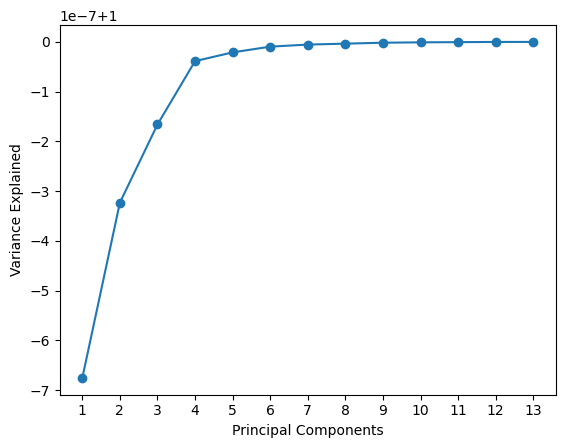

In [17]:
pca = PCA(n_components=None)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o')
plt.xticks(ticks= range(X_train_pca.shape[1]), labels=[i+1 for i in range(X_train_pca.shape[1])])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

#######################
Trying with regression

### Logistic Regression

In [18]:
model = LogisticRegression(random_state=0) 
r2_train, rmse_train = model_L(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val, y_val = y_val, nam="Logistic_Regression")

Test Data Set R^2 -0.08966202783300203
Test Data Set RMSE 0.2868523221067729
#########################################################
Validation Data Set R^2 -0.08749999999999991
Validation Data Set RMSE 0.2836543144655877
#########################################################


Model is very poor accuracy results. So, proceeding with the compaex models like Random Forest

### Random Forest

In [19]:
model = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)
r2_train, rmse_train = model_L(X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, model = model, valid = None, X_val = X_val, y_val = y_val, nam="Random_forest_classifier")

Test Data Set R^2 0.23771980092835443
Test Data Set RMSE 0.23992183851615376
#########################################################
Validation Data Set R^2 0.21951530612244907
Validation Data Set RMSE 0.24030176248892116
#########################################################


It shows some improvement on the model, where it shows it has 23% of R square value. Proceeding with hypertuning with classifiers.

In [20]:
grid_search_param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(10, 18),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
#From the above grid search this is the best parameter where it ran for around three hours.
grid_search_param = {'max_depth': [14], 'min_samples_leaf': [1], 'min_samples_split': [2], 'criterion': ['gini']}

best_model, best_score, best_param, y_pred_valt, score_val, grid_search = grid(model, grid_search_param, X_train, y_train, X_val = X_val, y_val = y_val, score= True)
model_(X_train, X_test, y_train, y_test, model=model,  valid = None, X_val = X_val, y_val = y_val, nam = "Random Forest CLASSIFIER GRID")

Test Data Set Confusion Marix:
 [[10011    49]
 [  582   320]]
Test Data Set Training accuracy: 1.0
Test Data Set Testing accuracy: 0.9424375114030287
Test Data Set Recall (Sensitivity): 0.9424375114030287
Test Data Set Specificity: 0.94505805720759
Test Data Set Precision: 0.938652278574218
Test Data Set False Positive Rate: 0.05494194279241005
Test Data Set F1 Score: 0.931110726102897
Test Data Set Score: 0.9424375114030287
#########################################################
Validation Data Set Confusion Marix:
 [[10038    42]
 [  591   291]]
Validation Data Set Training accuracy: 1.0
Validation Data Set Testing accuracy: 0.9422550629447182
Validation Data Set Recall (Sensitivity): 0.9422550629447182
Validation Data Set Specificity: 0.9443974033305109
Validation Data Set Precision: 0.9387230963627355
Validation Data Set False Positive Rate: 0.05560259666948908
Validation Data Set F1 Score: 0.929974399862055
Validation Data Set Score: 0.9422550629447182
#########################

(0, 0.9422550629447182)

##### Feature Checking

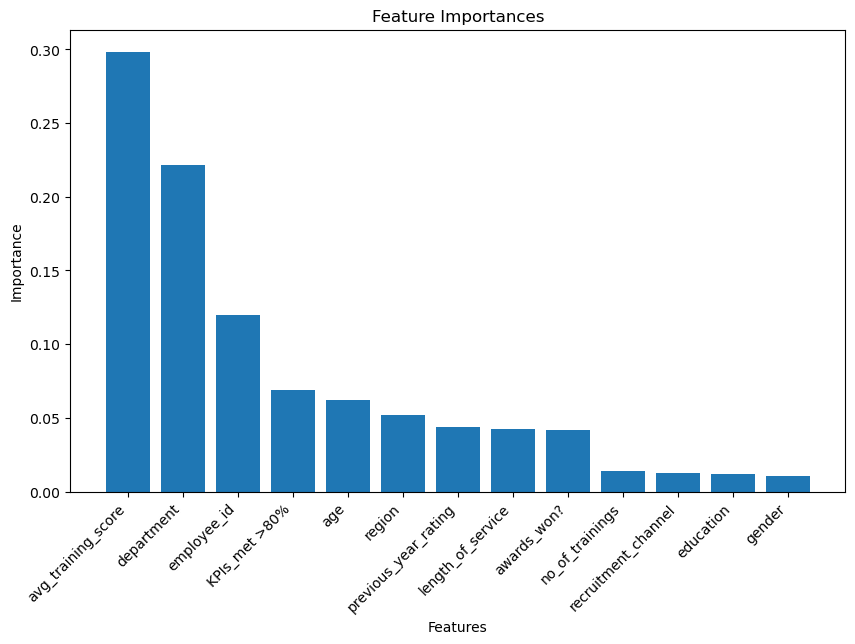

In [21]:
rdm_bst_mdl = best_model
save_model(rdm_bst_mdl)
featured_plot(best_model, train)

The above model shows the signifance of all the features in the table with the aggrgate score of _94% accuracy_.

##### Random Forest best model with PCA data points

In [22]:
model_(X_train_pca, X_test_pca, y_train, y_test, model=best_model,  valid = None, X_val = X_val_pca, y_val = y_val, nam = "Random Forest CLASSIFIER With PCA")

Test Data Set Confusion Marix:
 [[10031    29]
 [  627   275]]
Test Data Set Training accuracy: 0.9481206665855735
Test Data Set Testing accuracy: 0.940156905674147
Test Data Set Recall (Sensitivity): 0.940156905674147
Test Data Set Specificity: 0.9411709513980109
Test Data Set Precision: 0.9381621709936518
Test Data Set False Positive Rate: 0.05882904860198912
Test Data Set F1 Score: 0.9261838341936418
Test Data Set Score: 0.940156905674147
#########################################################
Validation Data Set Confusion Marix:
 [[10047    33]
 [  632   250]]
Validation Data Set Training accuracy: 0.9481206665855735
Validation Data Set Testing accuracy: 0.9393358876117497
Validation Data Set Recall (Sensitivity): 0.9393358876117497
Validation Data Set Specificity: 0.9408184286918251
Validation Data Set Precision: 0.9361979296366078
Validation Data Set False Positive Rate: 0.05918157130817492
Validation Data Set F1 Score: 0.9246154939697121
Validation Data Set Score: 0.9393358876

(0, 0.9393358876117497)

With PCA and without PCA dosen't give any significant change. So, this conclude it has some slightly high value, For further model will be utilize PCA dataset for the predicition.

#### Decision Tree

In [23]:
"""grid_search_param = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 15),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2']} 
"""
grid_search_param = {'criterion': ['gini'], 'max_depth': [9], 'max_features': [None], 'min_samples_leaf': [3], 'min_samples_split': [8]}

best_model, best_score, best_param, y_pred_valt, score_val, grid_search = grid(model, grid_search_param, X_train_pca, y_train, X_val = X_val_pca, y_val = y_val, score= True)
cv_scores, scr = model_(X_train_pca, X_test_pca, y_train, y_test, best_model, valid = None, X_val = X_val_pca, y_val = y_val, nam = "Decision Tree CLASSIFIER GRID PCA ")

Test Data Set Confusion Marix:
 [[10041    19]
 [  667   235]]
Test Data Set Training accuracy: 0.9360783359688603
Test Data Set Testing accuracy: 0.9374201787994891
Test Data Set Recall (Sensitivity): 0.9374201787994891
Test Data Set Specificity: 0.9377101232723197
Test Data Set Precision: 0.9366804779396692
Test Data Set False Positive Rate: 0.06228987672768027
Test Data Set F1 Score: 0.9208568087951743
Test Data Set Score: 0.9374201787994891
#########################################################
Validation Data Set Confusion Marix:
 [[10058    22]
 [  668   214]]
Validation Data Set Training accuracy: 0.9360783359688603
Validation Data Set Testing accuracy: 0.9370552818828681
Validation Data Set Recall (Sensitivity): 0.9370552818828681
Validation Data Set Specificity: 0.9377214245757971
Validation Data Set Precision: 0.9352318573929014
Validation Data Set False Positive Rate: 0.0622785754242029
Validation Data Set F1 Score: 0.9198471780331416
Validation Data Set Score: 0.93705528

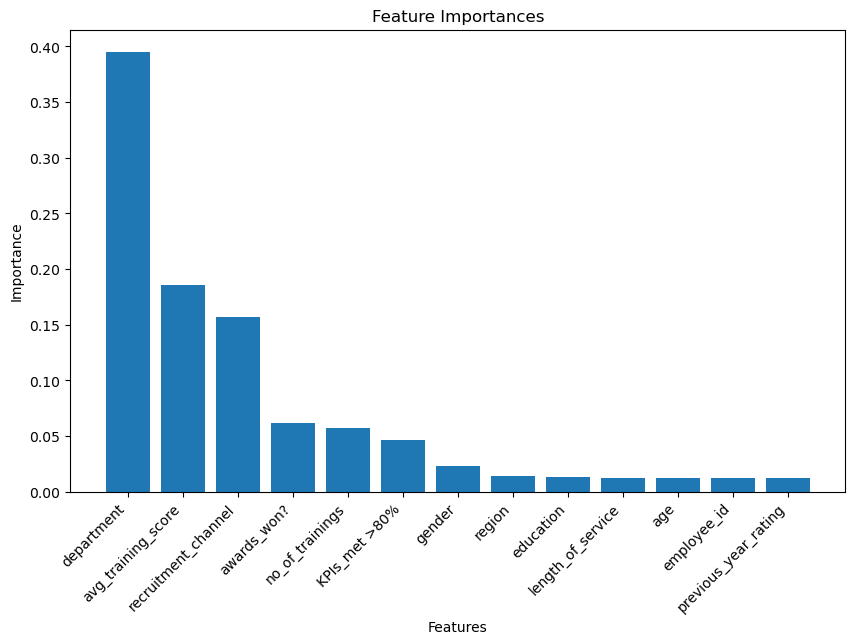

In [24]:
dt_bst_mdl = best_model
save_model(dt_bst_mdl)
featured_plot(best_model, train)

### XGBOOST Classifier

In [27]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    max_depth=3,
    eta=0.1,
    subsample=0.7,
    colsample_bytree=0.7
)
model_(X_train_pca, X_test_pca, y_train, y_test, model=model,  valid = None, X_val = X_val_pca, y_val = y_val, nam = "XGBOOST CLASSIFIER PCA HYPE")


Test Data Set Confusion Marix:
 [[10041    19]
 [  722   180]]
Test Data Set Training accuracy: 0.9278980659287192
Test Data Set Testing accuracy: 0.9324028461959496
Test Data Set Recall (Sensitivity): 0.9324028461959496
Test Data Set Specificity: 0.9329183313202639
Test Data Set Precision: 0.9305818108070407
Test Data Set False Positive Rate: 0.06708166867973608
Test Data Set F1 Score: 0.9119631669634775
Test Data Set Score: 0.9324028461959496
#########################################################
Validation Data Set Confusion Marix:
 [[10053    27]
 [  714   168]]
Validation Data Set Training accuracy: 0.9278980659287192
Validation Data Set Testing accuracy: 0.9324028461959496
Validation Data Set Recall (Sensitivity): 0.9324028461959496
Validation Data Set Specificity: 0.9336862635831708
Validation Data Set Precision: 0.9278812680163551
Validation Data Set False Positive Rate: 0.06631373641682925
Validation Data Set F1 Score: 0.911957119495282
Validation Data Set Score: 0.93240284

(0, 0.9324028461959496)

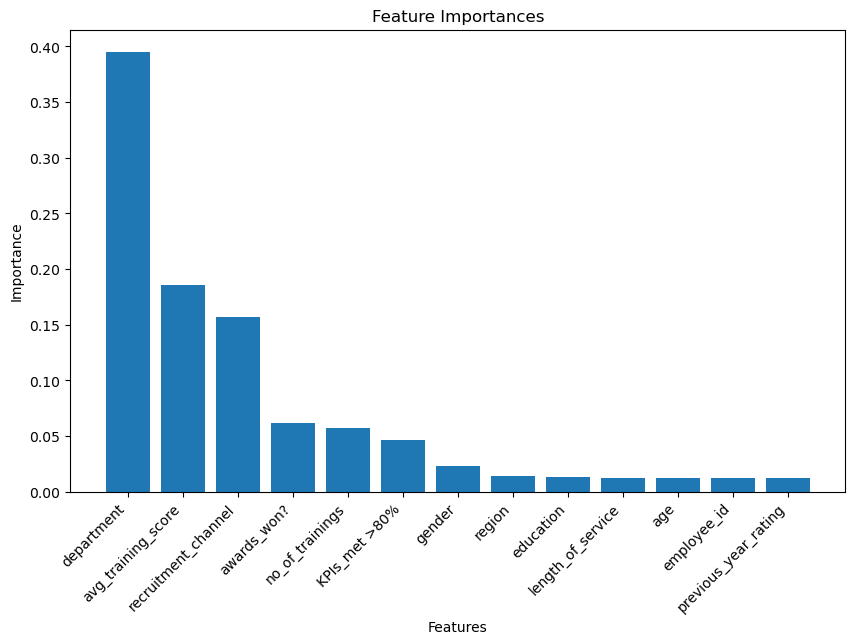

In [28]:
dt_bst_mdl = model
save_model(dt_bst_mdl)
featured_plot(best_model, train)

### CATBOOST

In [29]:
iterations = 500
learning_rate = 0.1
depth = 6
l2_leaf_reg = 3
loss_function = 'MultiClass'
eval_metric = 'Accuracy'
random_seed = 42

model = CatBoostClassifier(iterations=iterations,
                                    learning_rate=learning_rate,
                                    depth=depth,
                                    l2_leaf_reg=l2_leaf_reg,
                                    loss_function=loss_function,
                                    eval_metric=eval_metric,
                                    random_seed=random_seed)
model_(X_train_pca, X_test_pca, y_train, y_test, model=model,  valid = None, X_val = X_val_pca, y_val = y_val, nam = "CATBOOST CLASSIFIER PCA")

0:	learn: 0.9198090	total: 165ms	remaining: 1m 22s
1:	learn: 0.9206605	total: 171ms	remaining: 42.7s
2:	learn: 0.9205693	total: 178ms	remaining: 29.4s
3:	learn: 0.9209038	total: 186ms	remaining: 23.1s
4:	learn: 0.9210254	total: 194ms	remaining: 19.3s
5:	learn: 0.9210558	total: 201ms	remaining: 16.5s
6:	learn: 0.9205085	total: 207ms	remaining: 14.6s
7:	learn: 0.9206909	total: 213ms	remaining: 13.1s
8:	learn: 0.9212383	total: 220ms	remaining: 12s
9:	learn: 0.9211471	total: 226ms	remaining: 11.1s
10:	learn: 0.9215424	total: 234ms	remaining: 10.4s
11:	learn: 0.9216336	total: 242ms	remaining: 9.84s
12:	learn: 0.9214816	total: 250ms	remaining: 9.36s
13:	learn: 0.9214208	total: 258ms	remaining: 8.94s
14:	learn: 0.9221506	total: 266ms	remaining: 8.59s
15:	learn: 0.9224547	total: 272ms	remaining: 8.24s
16:	learn: 0.9224243	total: 280ms	remaining: 7.96s
17:	learn: 0.9224851	total: 286ms	remaining: 7.67s
18:	learn: 0.9227892	total: 293ms	remaining: 7.43s
19:	learn: 0.9227588	total: 299ms	remainin

(0, 0.9407954752782339)

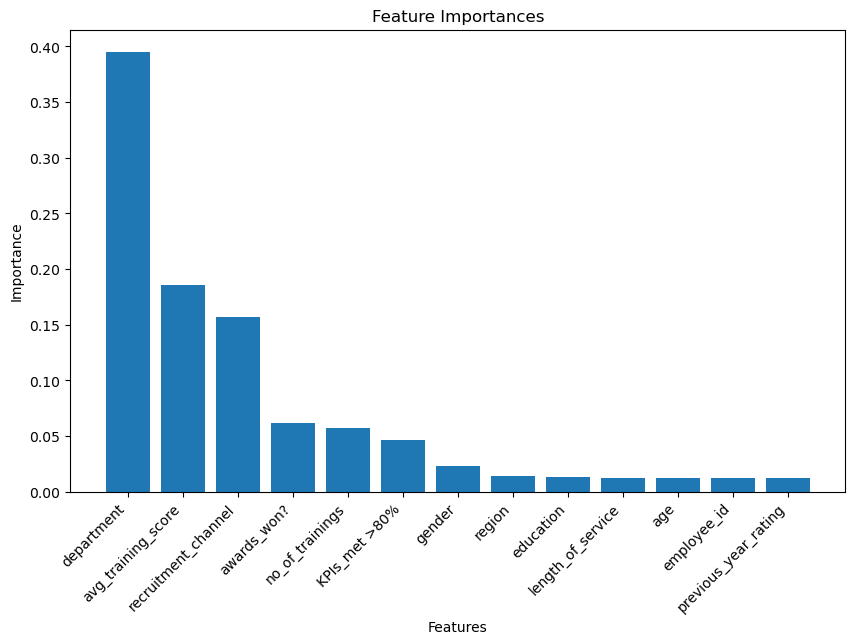

In [30]:
dt_bst_mdl = model
save_model(dt_bst_mdl)
featured_plot(best_model, train)

## **Conclusion**

In [36]:
tab = tabulate(Table_All, headers=["Model", "Score","2d","gr"], tablefmt='fancy_grid')
df = pd.DataFrame(Table_All, columns =["Model", "Score","2d","gr"])

In [41]:
df = df.drop(["2d","gr"], axis=1)
sort = df.sort_values("Score", ascending=False)
display(sort.iloc[:8])

,Model,Score
12,CATBOOST CLASSIFIER PCA_Test_Data_Set,0.943259
4,Random Forest CLASSIFIER GRID_Test_Data_Set,0.942438
5,Random Forest CLASSIFIER GRID_VALIDATION_Data_Set,0.942255
13,CATBOOST CLASSIFIER PCA_VALIDATION_Data_Set,0.940795
6,Random Forest CLASSIFIER With PCA_Test_Data_Set,0.940157
7,Random Forest CLASSIFIER With PCA_VALIDATION_D...,0.939336
8,Decision Tree CLASSIFIER GRID PCA _Test_Data_Set,0.937420
9,Decision Tree CLASSIFIER GRID PCA _VALIDATION_...,0.937055


## **Conclusion**
The predictive model developed for the HR analytics project has provided robust insights into identifying potential candidates for promotion within the multinational corporation. By leveraging data points such as past performance ratings, KPI achievements, training outcomes, and demographic characteristics, the model efficiently discriminates between employees who are likely to succeed in higher managerial roles and those who might require further development.

### Key HR metrics highlighted through this analysis include:

- Training Effectiveness: Measured by the average training score, this metric correlates strongly with promotion eligibility, emphasizing the importance of targeted training programs.
- Performance Consistency: Previous year ratings serve as a critical indicator of an employee's consistent performance, heavily influencing promotion decisions.
- KPI Completion: With a threshold set at 80%, this metric significantly impacts promotion probabilities, indicating that employees who exceed this benchmark demonstrate qualities essential for leadership roles.
- Longevity and Experience: Length of service contributes to understanding employee stability and loyalty, which are valued for promotion considerations.
The early identification system proposed by the model minimizes delays in role transitions, facilitating smoother operational flow and enhancing employee satisfaction through timely recognition. By implementing this predictive system, the company can not only streamline its promotion process but also reinforce a merit-based advancement culture that is transparent and fair.

This model encourages continuous improvement in the training programs and suggests a periodic review of KPIs to align with evolving organizational goals. Overall, the adoption of this analytical approach will enhance decision-making processes in HR management, promoting a highly competent and motivated workforce.

## **Model Performance Overview**
### CATBOOST CLASSIFIER PCA on Test Data Set:
- Score: 0.943259
- Observations: This model shows the highest score among all models on the test dataset, indicating a highly effective prediction capability when applied to unseen data. The use of PCA (Principal Component Analysis) suggests that dimensionality reduction might be improving the model's focus on the most relevant features.
### Random Forest CLASSIFIER GRID on Test Data Set:
- Score: 0.942438
- Observations: Very close to the CATBOOST model, this Random Forest model also performs robustly on the test dataset. The "GRID" likely indicates that hyperparameter tuning via grid search was used, optimizing the model's parameters for better performance.
### Random Forest CLASSIFIER GRID on VALIDATION Data Set:
- Score: 0.942255
- Observations: The slight drop in score from the test dataset to the validation dataset is minimal, suggesting good generalization and consistency in the model's predictive quality.